In [19]:
import os
import tables as tb
import numpy  as np
from matplotlib import pyplot as plt

from invisible_cities.cities.dorothea        import Dorothea
from invisible_cities.core.system_of_units_c import units
from invisible_cities.core.configure         import configure
from invisible_cities.reco.dst_functions     import load_dst
from invisible_cities.io                     import pmap_io  as pio
from invisible_cities.core import fit_functions as fitf

In [20]:
run = 4446
ic_data = os.path.join(os.environ['IC_DATA'])
#pmap_path = ic_data + 'Montecarlo/Kr/dst_NEXT_v0_08_09_Kr_ACTIVE_0_0_7bar_pmaps_10000.root.h5'           # old MC
pmap_path = '/Users/alej/Desktop/irene/full_chain/Kr_4446_full_chain.h5'                                 # data
#pmap_path =  ic_data + 'Montecarlo/Kr/new_mc/dst_NEXT_v1_00_05_Kr_ACTIVE_0_0_7bar_pmaps_1000.root.h5.h5'  # new MC
conf_path = '/Users/alej/Desktop/Valencia/nextic/IC-1/invisible_cities/config/dorothea.conf'

In [21]:
# initialize dorothea
PATH_IN  = os.path.join(pmap_path)
PATH_OUT = os.path.join('/Users/alej/Desktop/dorothea/garbage.h5')
conf     = configure(('dummy ' + conf_path).split()).as_dict
conf.update(dict(run_number = run,
                 files_in   = PATH_IN,
                 file_out   = PATH_OUT,
                 nmax       = 100000))
dorothea = Dorothea(**conf)

In [22]:
#dorothea.run()

In [23]:
dst = load_dst(PATH_OUT, "DST", "Events")
#dst

In [24]:

events_in_dst = dst.event.values
nevents_represented_in_dst = len(set(events_in_dst))
#print('Event efficiency: ' + str(n_events_represented_in_dst / dorothea.cnt.cd['n_events_tot']))
print('Event efficiency: ' + str(nevents_represented_in_dst / 1000))

Event efficiency: 0.465


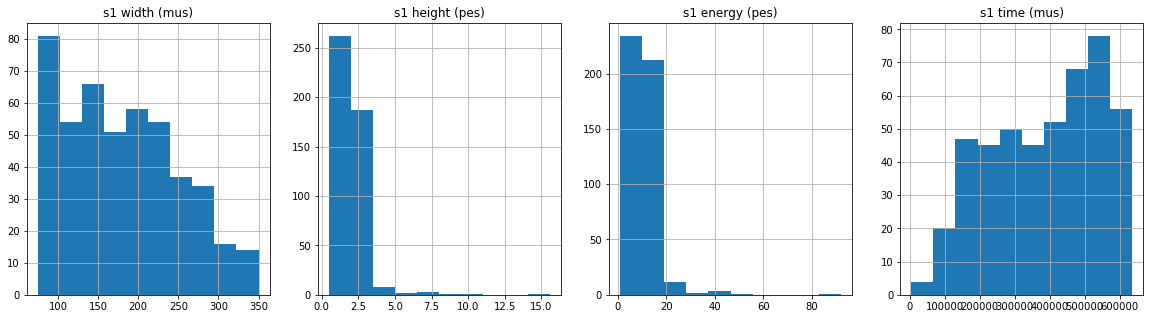

In [25]:
plt.figure(figsize=(20,5))
subplot=141
for feature, lab in zip([dst.S1w, dst.S1h, dst.S1e, dst.S1t], 
                   ['s1 width (mus)', 's1 height (pes)', 's1 energy (pes)', 's1 time (mus)']):
    plt.subplot(subplot)
    if lab=='s1 time':plt.hist(feature / units.mus)
    else:plt.hist(feature)
    plt.title(lab)
    plt.grid(True)
    subplot+=1
plt.show()  

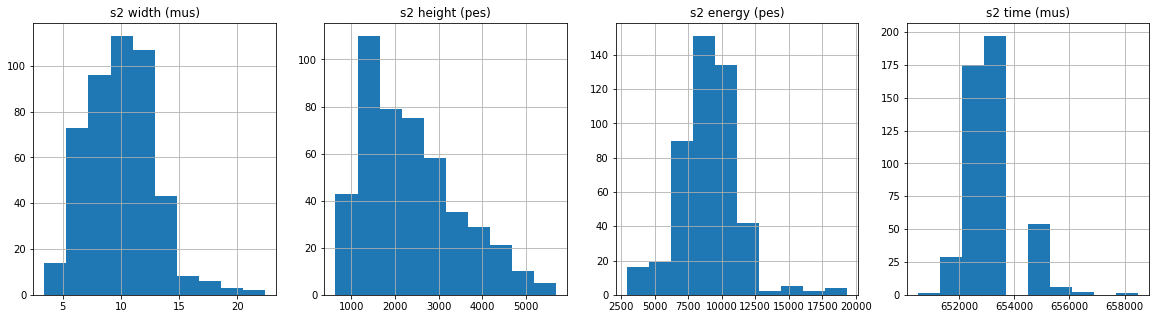

In [26]:
plt.figure(figsize=(20,5))
subplot=141
for feature, lab in zip([dst.S2w, dst.S2h, dst.S2e, dst.S2t], 
                   ['s2 width (mus)', 's2 height (pes)', 's2 energy (pes)', 's2 time (mus)']):
    plt.subplot(subplot)
    if lab=='s2 time':plt.hist(feature / units.mus)
    else:plt.hist(feature)
    plt.title(lab)
    plt.grid(True)
    #plt.yscale('log')
    subplot+=1
plt.show()  

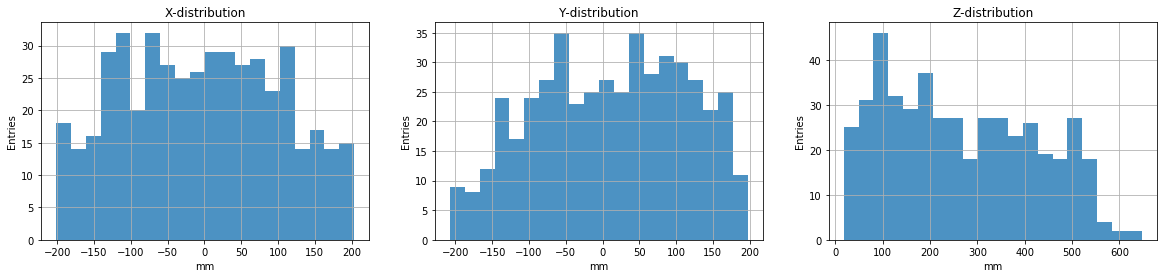

In [27]:
plt.figure(figsize=(20,4))
subplot=131
for feature, coord in zip([dst.X, dst.Y, dst.Z], ['X', 'Y', 'Z']):
    plt.subplot(subplot)
    plt.hist(feature, bins=20, alpha=.8)
    plt.title(coord + '-distribution')
    plt.xlabel('mm')
    plt.ylabel('Entries')
    plt.grid(True)
    subplot+=1
plt.show()

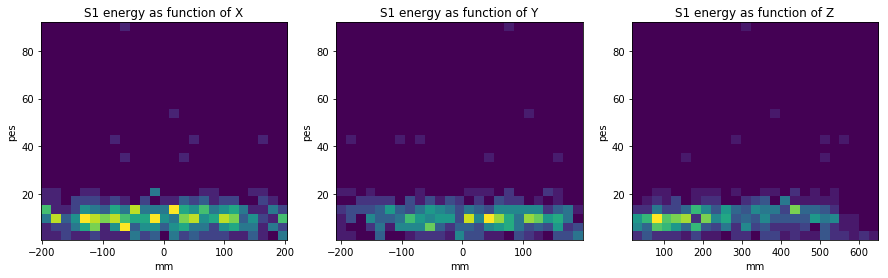

In [28]:
plt.figure(figsize=(15,4))
subplot=131
for feature, lab in zip([dst.X, dst.Y, dst.Z], ['X', 'Y', 'Z']):
    plt.subplot(subplot)
    plt.hist2d(feature, dst.S1e, bins=25)
    plt.title('S1 energy as function of ' + lab)
    plt.xlabel('mm')
    plt.ylabel('pes')
    subplot+=1
plt.show()

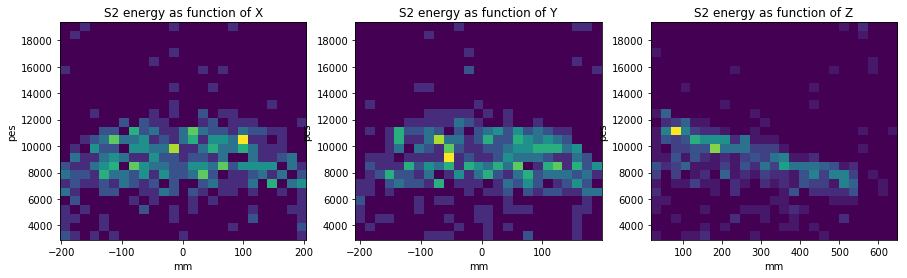

In [29]:
plt.figure(figsize=(15,4))
subplot=131
for feature, lab in zip([dst.X, dst.Y, dst.Z], ['X', 'Y', 'Z']):
    plt.subplot(subplot)
    plt.hist2d(feature, dst.S2e, bins=25)
    plt.title('S2 energy as function of ' + lab)
    plt.xlabel('mm')
    plt.ylabel('pes')
    #plt.ylim(2e3,2.5e3)
    subplot+=1
plt.show()

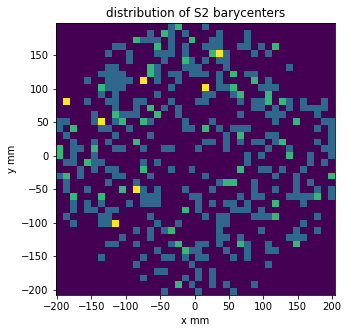

In [30]:
plt.figure(figsize=(5,5))
plt.hist2d(dst.X, dst.Y, bins=(40, 40))
plt.xlabel('x mm') 
plt.ylabel('y mm')
plt.title('distribution of S2 barycenters')
plt.show()

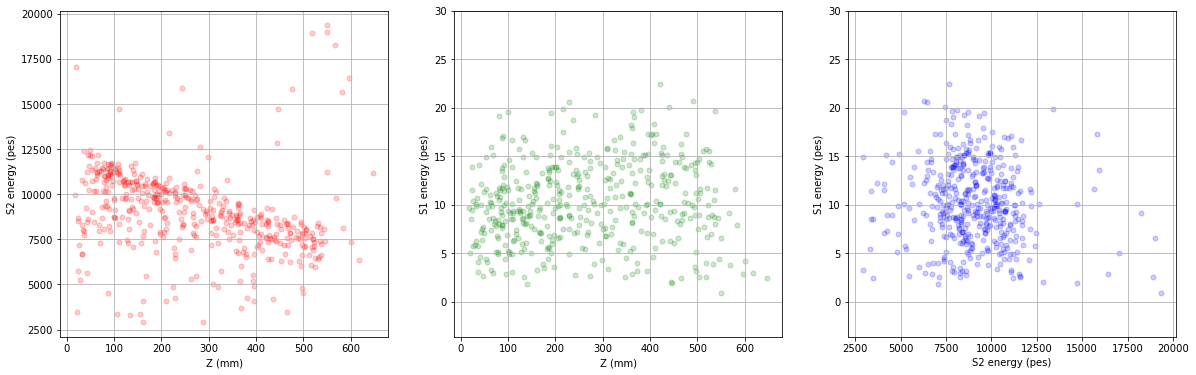

In [31]:
figsize=(20,6)
plt.figure(figsize=figsize)
ax = plt.subplot(1, 3, 1)
#plt.hist2d(dst.Z, dst.S2e, bins=(25, 25))
plt.scatter(dst.Z, dst.S2e, c='r', s=25, alpha=.2)
plt.xlabel('Z (mm)')
plt.ylabel('S2 energy (pes)')
#plt.ylim(None,6000)

plt.grid(True)

ax = plt.subplot(1, 3, 2)
#plt.hist2d(dst.Z, dst.S1e, bins=(25, 25))
plt.scatter(dst.Z, dst.S1e, c='g', s=25, alpha=.2)
plt.xlabel('Z (mm)')
plt.ylabel('S1 energy (pes)')
plt.ylim(None,30)

plt.grid(True)

ax = plt.subplot(1, 3, 3)
#plt.hist2d(dst.S2e, dst.S1e, bins=(25, 25))
plt.scatter(dst.S2e, dst.S1e, c='b', s=25, alpha=.2)
plt.xlabel('S2 energy (pes)')
plt.ylabel('S1 energy (pes)')
plt.ylim(None,30)
plt.grid(True)
plt.show()

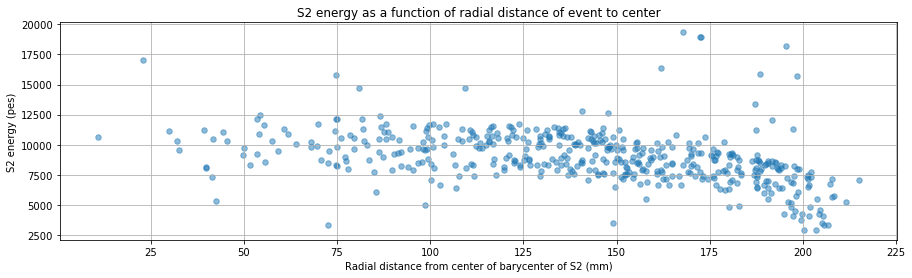

In [32]:
plt.figure(figsize=(15,4))
plt.scatter(dst.R, dst.S2e, s=30, alpha=.5)
plt.grid(True)
plt.title('S2 energy as a function of radial distance of event to center')
plt.xlabel('Radial distance from center of barycenter of S2 (mm)')
plt.ylabel('S2 energy (pes)')
#plt.ylim(None,20000)
plt.show()

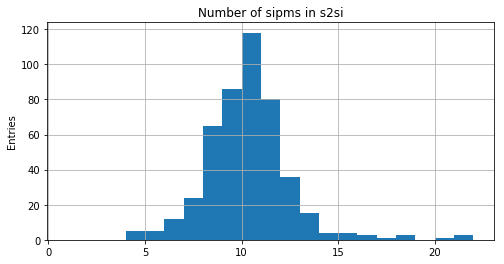

In [33]:
plt.figure(figsize=(8,4))
plt.hist(dst.Nsipm, bins=range(1, dst.Nsipm.max()+1))
plt.grid(True)
#plt.xlim(None,40)
plt.ylabel('Entries')
plt.title('Number of sipms in s2si')
plt.show()